In [5]:
import pandas as pd
import numpy as np
import abc
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [82]:
def gen_data(n=200):
    return 0.9*np.random.normal(5,1,n)+ 0.1*np.random.normal(10,1,n)

In [83]:
def real_dist(x):
    return 0.9*np.exp(-0.5*(x-5)**2)/np.sqrt(2*np.pi)+0.1*np.exp(-0.5*(x-10)**2)/np.sqrt(2*np.pi)

In [84]:
class DensityEstimator(abc.ABC):
    @abc.abstractmethod
    def eval(self, X):
        pass

In [85]:
class NormalKernelDE(DensityEstimator):
    def __init__(self,X, h=1):
        self.h = h
        self.X = X
        
    def eval(self, X):
        return (len(self.X)*self.h)

In [86]:
class UniformKernelDE(DensityEstimator):
    def __init__(self,X, h=1):
        self.h = h
        self.X = X
    def eval(self, X):
        return np.array([np.sum([np.abs((x-xn)/self.h)<0.5 for xn in self.X])/(len(self.X)*self.h) for x in X])

In [96]:
X=gen_data(10000)

In [60]:
xlin=np.linspace(2,12,200)

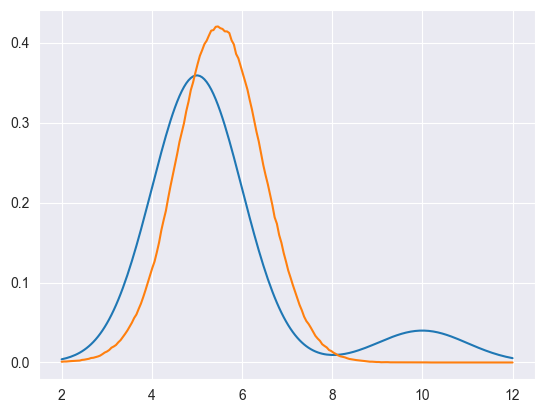

In [98]:
estim=UniformKernelDE(X,h=1)
plt.plot(xlin,real_dist(xlin))
plt.plot(xlin,estim.eval(xlin))

In [108]:
X.var()

np.float64(0.8185197402002204)

In [106]:
xlin

array([ 2.        ,  2.05025126,  2.10050251,  2.15075377,  2.20100503,
        2.25125628,  2.30150754,  2.35175879,  2.40201005,  2.45226131,
        2.50251256,  2.55276382,  2.60301508,  2.65326633,  2.70351759,
        2.75376884,  2.8040201 ,  2.85427136,  2.90452261,  2.95477387,
        3.00502513,  3.05527638,  3.10552764,  3.15577889,  3.20603015,
        3.25628141,  3.30653266,  3.35678392,  3.40703518,  3.45728643,
        3.50753769,  3.55778894,  3.6080402 ,  3.65829146,  3.70854271,
        3.75879397,  3.80904523,  3.85929648,  3.90954774,  3.95979899,
        4.01005025,  4.06030151,  4.11055276,  4.16080402,  4.21105528,
        4.26130653,  4.31155779,  4.36180905,  4.4120603 ,  4.46231156,
        4.51256281,  4.56281407,  4.61306533,  4.66331658,  4.71356784,
        4.7638191 ,  4.81407035,  4.86432161,  4.91457286,  4.96482412,
        5.01507538,  5.06532663,  5.11557789,  5.16582915,  5.2160804 ,
        5.26633166,  5.31658291,  5.36683417,  5.41708543,  5.46

In [62]:
estim.eval(xlin)

array([0.        , 0.00714286, 0.00714286, 0.00714286, 0.00714286,
       0.00714286, 0.00714286, 0.00714286, 0.00714286, 0.00714286,
       0.00714286, 0.00714286, 0.00714286, 0.01428571, 0.01428571,
       0.00714286, 0.01428571, 0.01428571, 0.02142857, 0.02142857,
       0.02142857, 0.02142857, 0.02142857, 0.02857143, 0.02857143,
       0.02857143, 0.03571429, 0.03571429, 0.03571429, 0.04285714,
       0.04285714, 0.05      , 0.04285714, 0.06428571, 0.07142857,
       0.08571429, 0.08571429, 0.08571429, 0.1       , 0.10714286,
       0.11428571, 0.11428571, 0.14285714, 0.14285714, 0.17857143,
       0.18571429, 0.20714286, 0.20714286, 0.21428571, 0.22857143,
       0.27857143, 0.3       , 0.32142857, 0.33571429, 0.34285714,
       0.36428571, 0.35      , 0.35      , 0.32857143, 0.33571429,
       0.35714286, 0.37857143, 0.37857143, 0.39285714, 0.37857143,
       0.40714286, 0.38571429, 0.4       , 0.41428571, 0.40714286,
       0.40714286, 0.42142857, 0.42857143, 0.42857143, 0.42857